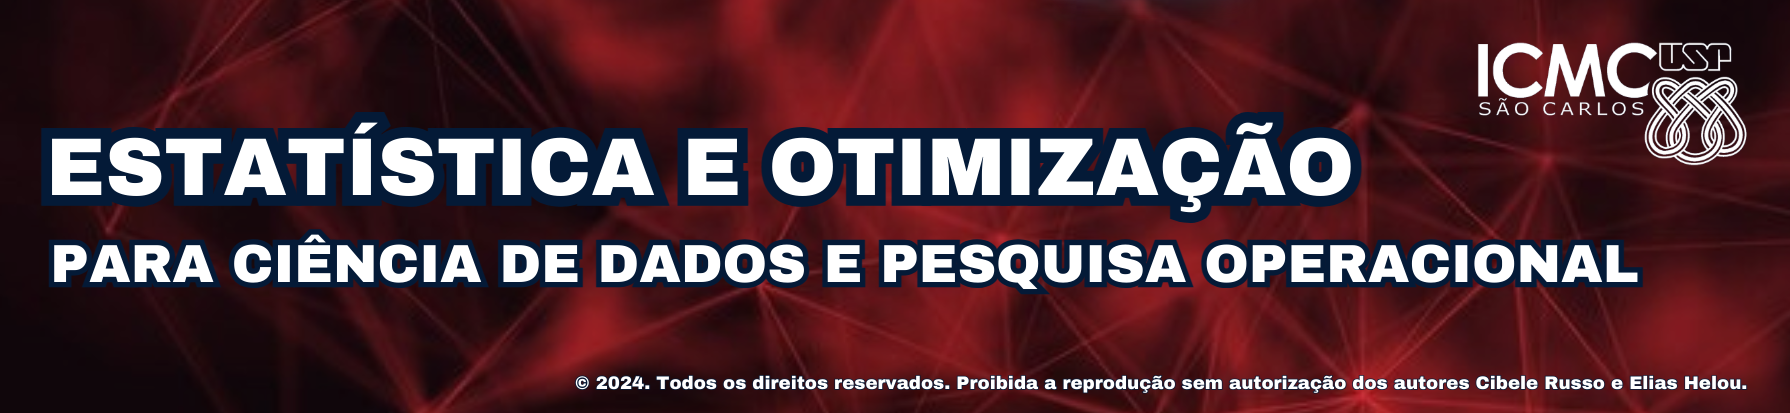

<h1 style = 'text-align: center;'>Problemas de Fluxos em Redes:<br>Grafos e o Problema do Caminho Mínimo</h1>

por **Elias Helou**

**ICMC/USP - São Carlos SP**

<h2>Conteúdo do vídeo</h2>

1. Grafos

2. O Problema do caminho mínimo

3. Formulação binária

## 1. Grafos

O conceito de grafo tem importância fundamental em matemática pura e aplicada pois, apesar da sua simplicidade, grafos são capazes de modelar situações complexas que dão origem a sofisticadas propriedades emergentes. Algumas das aplicações de grafos são

- Ciência da computação

- Física, medicina, biologia (normalmente através de redes complexas)

- Economia

- Logística

No nosso caso, iremos nos concentrar em problemas de logística que são modelados através de grafos. Muitos desses são conhecidos como problemas de fluxos em redes.

Um grafo consiste de um conjunto de vértices (ou nós)
$$
    V = \{ 1, 2, \dots, N \}
$$
e de um conjunto de arestas
$$
    E \subset V \times V.
$$

Grafos são comumente representados graficamente como uma rede de vértices interligados pelas arestas. A seguir vemos um exemplo de uma possível representação de um grafo com
$$
    V = \{ 1, 2, 3, 4, 5 \}
$$
e
$$
    E = \{ ( 1, 2 ), ( 1, 3 ), ( 1, 5 ), ( 2, 3 ), ( 3, 4 ), ( 4, 5 ) \}.
$$

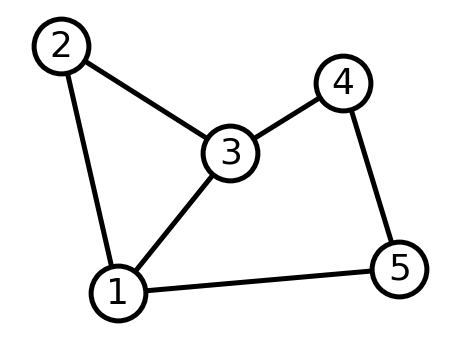

In [ ]:
# Exemplo adaptado da documentação do NetworkX
# https://networkx.org/documentation/stable/auto_examples/basic/plot_simple_graph.html#sphx-glr-auto-examples-basic-plot-simple-graph-py

import networkx as nx
import matplotlib.pyplot as pp

# Exemplo adaptado da documentação do networkx

G = nx.Graph()
G.add_edge( 1, 2 )
G.add_edge( 1, 3 )
G.add_edge( 1, 5 )
G.add_edge( 2, 3 )
G.add_edge( 3, 4 )
G.add_edge( 4, 5 )

# Posições do vértices
pos = { 1: (0, 0), 2: (-1, 0.3), 3: (2, 0.17), 4: (4, 0.255), 5: (5, 0.03) }

options = {
    "font_size": 36,
    "node_size": 3000,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 5,
    "width": 5,
}

pp.figure( figsize = ( 8, 6 ) )
nx.draw_networkx( G, pos, **options )
pp.margins( 0.1 )
pp.axis( 'off' )
pp.show()

### 1.1. Grafos Direcionados

O grafo acima é um exemplo de grafo não-direcionado. Grafos direcionados (ou dígrafos) são grafos onde as arestas possuem direção.

Por exemplo, consideremo o grafo com
$$
    V = \{ 1, 2, 3, 4, 5, 6, 7 \}
$$
e
$$
    E = \{ ( 1, 4 ), ( 2, 4 ), ( 3, 5 ), ( 4, 6 ), ( 4, 7 ), ( 5, 7 ), ( 6, 7 ), ( 7, 4 ) \}.
$$

Observe que temos as arestas $( 4, 7 )$ e $( 7, 4 )$.

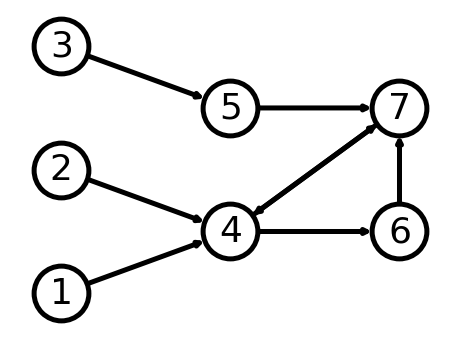

In [ ]:
# Exemplo adaptado da documentação do NetworkX
# https://networkx.org/documentation/stable/auto_examples/basic/plot_simple_graph.html#sphx-glr-auto-examples-basic-plot-simple-graph-py

import networkx as nx
import matplotlib.pyplot as pp

G = nx.DiGraph(
    [ ( 1, 4 ), ( 2, 4 ), ( 3, 5 ), ( 4, 6 ), ( 4, 7 ), ( 5, 7 ), ( 6, 7 ), ( 7, 4 ) ]
)

# Agrupa nós por colunas
left_nodes = [ 1, 2, 3 ]
middle_nodes = [ 4, 5 ]
right_nodes = [ 6, 7 ]

# Ajusta coordenada x por colunas
pos = { n: ( 0, i ) for i, n in enumerate( left_nodes ) }
pos.update( { n: (1, i + 0.5) for i, n in enumerate( middle_nodes ) } )
pos.update( {n: (2, i + 0.5) for i, n in enumerate( right_nodes ) } )

options = {
    "font_size": 36,
    "node_size": 3000,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 5,
    "width": 5,
}

pp.figure( figsize = ( 8, 6 ) )
nx.draw_networkx( G, pos, **options )
pp.margins( 0.1 )
pp.axis( 'off' )
pp.show()

Algumas observações:

1. Nem sempre as posições dos nós são pré-determinadas

2. Pode haver nós ou subgrafos isolados

3. Em casos realistas, o número de nós e arestas pode ser gigantesco

## 2. O Problema do Caminho Mínimo

Um dígrafo pode representar uma rede viária onde os nós são pontos intermediários e as arestas são trechos de ruas interligando esses pontos. Neste caso, podemos desejar ir de um ponto a outro de forma a minimizar a distância percorrida. Nos nossos problemas, a origem será o nó denotado por
$$
    o \in V
$$
e o destino será o nó denotado por
$$
    d \in V.
$$

Para modelar este problema, precisamos associar pesos a cada aresta para representar o custo de ir de um nó para outro. O modelo completo exige, portanto, além do dígrafo, da origem e do destino, uma função peso:
$$
    V = \{ 1, 2, \dots, N \},
$$
$$
    E \subset V \times V,
$$
$$
    f: E \to \mathbb R.
$$

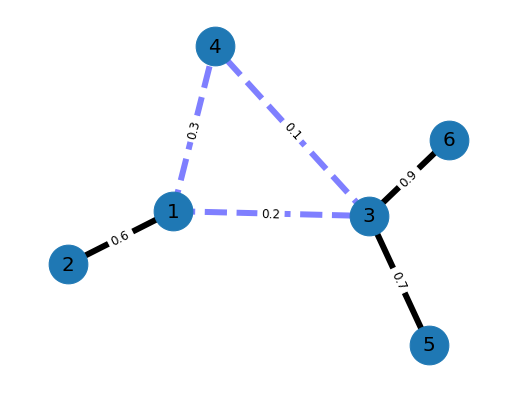

In [ ]:
# Exemplo adaptado da documentação do NetworkX
# https://networkx.org/documentation/stable/auto_examples/drawing/plot_weighted_graph.html

import networkx as nx
import matplotlib.pyplot as pp

G = nx.Graph()

G.add_edge( 1, 2, weight = 0.6 )
G.add_edge( 1, 3, weight = 0.2 )
G.add_edge( 3, 4, weight = 0.1 )
G.add_edge( 3, 5, weight = 0.7 )
G.add_edge( 3, 6, weight = 0.9 )
G.add_edge( 1, 4, weight = 0.3 )

elarge = [ ( u, v ) for ( u, v, d ) in G.edges( data = True ) if d[ 'weight' ] > 0.5 ]
esmall = [ ( u, v ) for ( u, v, d ) in G.edges( data = True ) if d[ 'weight' ] <= 0.5 ]

pos = nx.spring_layout( G, seed = 0 )

pp.figure( figsize = ( 9, 7 ) )

nx.draw_networkx_nodes( G, pos, node_size = 1500 )

nx.draw_networkx_edges( G, pos, edgelist = elarge, width = 6 )
nx.draw_networkx_edges( G, pos, edgelist = esmall, width = 6, alpha = 0.5, edge_color = 'b', style = 'dashed' )

nx.draw_networkx_labels( G, pos, font_size = 20, font_family = 'sans-serif' )

edge_labels = nx.get_edge_attributes( G, 'weight' )
nx.draw_networkx_edge_labels( G, pos, edge_labels, font_size = 12, font_family = 'sans-serif' )

pp.margins( 0.1 )
pp.axis( 'off' )
pp.show()


O grafo acima é muito pequeno. Abaixo vemos um exemplo com um número de nós mais realista.

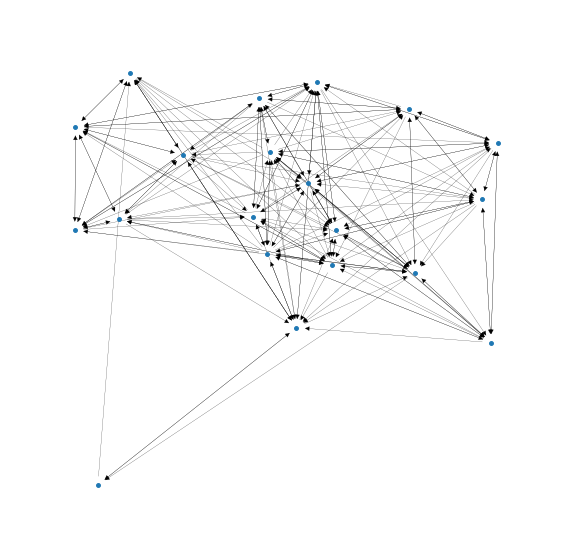

DiGraph with 20 nodes and 194 edges


In [ ]:
import networkx as nx
import matplotlib.pyplot as pp
import numpy as np

N = 20

# Gera N pontos aleatórios no quadrado [ 0, 1 ] x [ 0, 1 ]
np.random.seed( 0 )
pos = {}
for i in range( 1, N + 1 ):
    pos[ i ] = tuple( np.random.uniform( size = ( 2, ) ) )

# Conecta vértices com probabilidade proporcional à distância
G = nx.DiGraph()
for i in range( 1, N + 1 ):
    for j in range( 1, N + 1 ):
        d = (
            ( pos[ i ][ 0 ] - pos[ j ][ 0 ] ) ** 2 +
            ( pos[ i ][ 1 ] - pos[ j ][ 1 ] ) ** 2
        ) ** 0.5

        r = np.random.uniform()
        if ( i != j ) and ( d < r ):
            G.add_edge( i, j, weight = d )

pp.figure( figsize = ( 10, 10 ) )

nx.draw_networkx_nodes( G, pos, node_size = 15 )
nx.draw_networkx_edges( G, pos, width = 0.2 )

pp.margins( 0.1 )
pp.axis( 'off' )
pp.show()

print( G )

## 3. Formulação Binária do Problema de Caminho Mínimo

Iremos denotar as variáveis de decisão por
$$
        x_{i, j} \in \{ 0, 1 \} \quad\text{para todo } ( i, j ) \in E.
$$


Ou seja, para cada aresta do grafo haverá uma variável de decisão *binária* que vale
$$
        x_{i, j} = \begin{cases}
                        1 & \text{se o caminho passa pela aresta }( i, j )\\
                        0 & \text{caso contrário.}
                   \end{cases}
$$

Um caminho sai de $o$, então é necessário que haja exatamente uma aresta do caminho partindo de $o$
$$
        \sum_{( o, j ) \in E}x_{o, j} = 1.
$$
Da mesma forma, é necessário que haja exatamente uma aresta do caminho chegando a $d$:
$$
        \sum_{( i, d ) \in E}x_{i, d} = 1.
$$
Para todo outros nó $k$, se um caminho chega até $k$, ele tem que sair de $k$:
$$
        \sum_{( i, k ) \in E}x_{i, k} = \sum_{( k, j ) \in E}x_{k, j}\quad \forall k \in V \setminus \{o, d\}.
$$

Levando em conta o custo de percorrer cada aresta, teremos o problema
$$
\begin{align*}
        \min       & \quad \sum_{( i, j ) \in E} f( i, j )x_{i, j}\\
        \text{s.a:}& \quad \sum_{( o, j ) \in E}x_{o, j} = 1\\
                   & \quad \sum_{( i, d ) \in E}x_{i, d} = 1\\
                   & \quad \sum_{( i, k ) \in E}x_{i, k} = \sum_{( k, j ) \in E}x_{k, j} &\quad \forall k \in V \setminus \{o, d\}\\
                   & \quad x_{i, j} \in \{ 0, 1 \} \quad &\forall ( i, j ) \in E.
\end{align*}
$$

Uma forma interessante e útil de escrever esse problema é
$$
\begin{align*}
        \min       & \quad \sum_{( i, j ) \in E} f( i, j )x_{i, j}\\
        \text{s.a:}& \quad \sum_{( i, k ) \in E}x_{i, k} - \sum_{( k, j ) \in E}x_{k, j} = \begin{cases}1 &\text{se } k = d\\ -1 &\text{se } k = o\\ 0 & \text{caso contrário}\end{cases} &\quad \forall k \in V\\
                   & \quad x_{i, j} \in \{ 0, 1 \} \quad &\forall ( i, j ) \in E.
\end{align*}
$$


- Problemas binários são difíceis de resolver

- Existem algoritmos muito eficientes específicos para este problema

- Restrições da forma abaixo, para $k$ fixo, são conhecidas como restições de conservação do fluxo
$$
    \sum_{( i, k ) \in E}x_{i, k} - \sum_{( k, j ) \in E}x_{k, j} = 0.
$$

- É possível formular como um problema de otimização linear trocando a última restrição por
$$
    x_{i, j} \ge 0 \quad \forall ( i, j ) \in E
$$


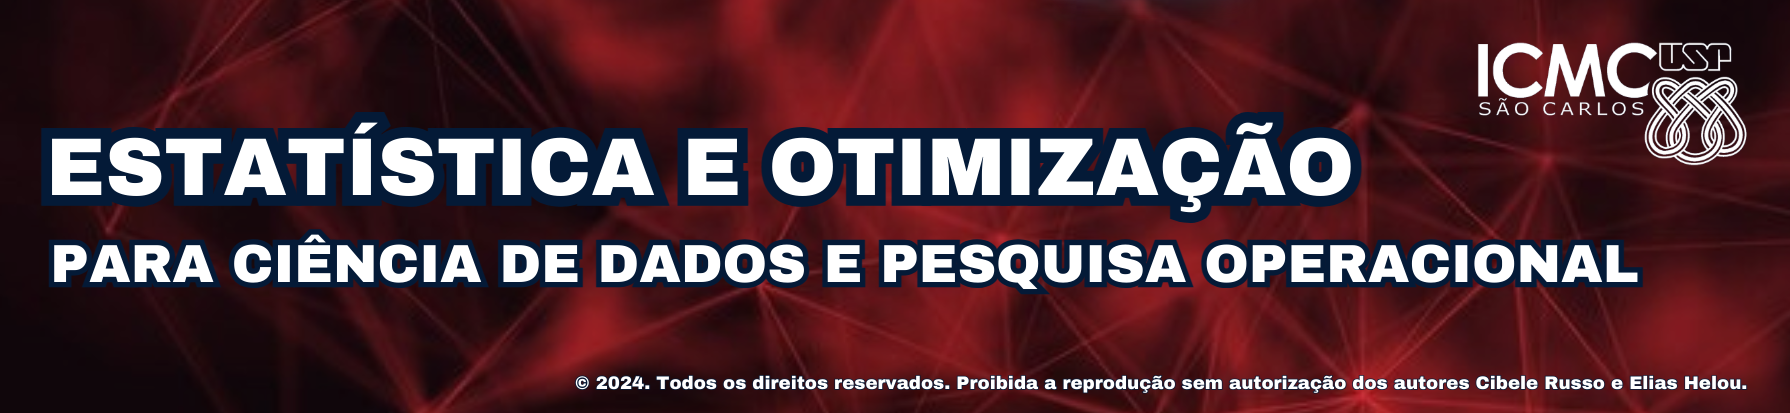

<h1 style = 'text-align: center;'>Problemas de Fluxos em Redes:<br>Resolvendo o Problema do Caminho Mínimo</h1>

por **Elias Helou**

**ICMC/USP - São Carlos SP**

<h2>Conteúdo do Vídeo</h2>

1. Algoritmos para o problema do caminho mínimo

2. Resolvendo com o `NetworkX`

3. Resolvendo com otimização linear

## 1. Algoritmos para o Problema do Caminho Mínimo

Nós já vimos que é possível formular o problema do caminho mínimo como um problema de otimização matemática binária e relaxar esse modelo como um problema de otimização linear.

Entretanto, existem métodos muito mais eficientes para resolver esse problema. As aplicações são evidentes, as variantes são muitas e os ambientes computacionais, os mais variados. Por este motivo, diversos algoritmos foram desenvolvidos.

<div style="text-align: center;">
 <iframe type="text/html" src="https://en.wikipedia.org/wiki/Shortest_path_problem" width="90%" height="400" style="text-align: center; border: solid; border-radius: 10px">
</div>

## 2. Resolvendo Usando o `NetworkX`

O pacote `NetworkX` possui funções para a solução do problema do caminho mínimo

<div style="text-align: center;">
 <iframe type="text/html" src="https://networkx.org/documentation/stable/reference/algorithms/shortest_paths.html" width="90%" height="700px" style="text-align: center; border: solid; border-radius: 10px;">
</div>

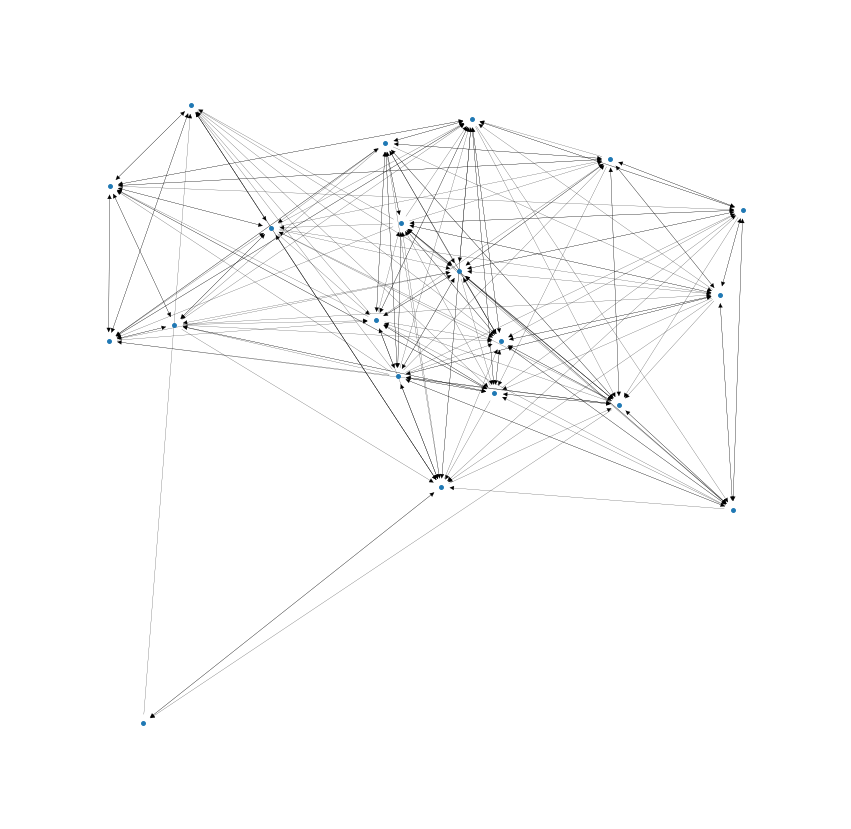

In [ ]:
import networkx as nx
import matplotlib.pyplot as pp
import numpy as np

N = 20

# Gera N pontos aleatórios no quadrado [ 0, 1 ] x [ 0, 1 ]
np.random.seed( 0 )
pos = {}
for i in range( 1, N + 1 ):
    pos[ i ] = np.random.uniform( size = ( 2, ) )

# Conecta vértices com probabilidade proporcional à distância
G = nx.DiGraph()
for i in range( 1, N + 1 ):
    for j in range( 1, N + 1 ):
        d = (
            ( pos[ i ][ 0 ] - pos[ j ][ 0 ] ) ** 2 +
            ( pos[ i ][ 1 ] - pos[ j ][ 1 ] ) ** 2
        ) ** 0.5

        r = np.random.uniform()
        if ( i != j ) and ( d < r ):
            G.add_edge( i, j, weight = d )

pp.figure( figsize = ( 15, 15 ) )

nx.draw_networkx_nodes( G, pos, node_size = 15 )
nx.draw_networkx_edges( G, pos, width = 0.2 )

pp.margins( 0.1 )
pp.axis( 'off' )
pp.show()


18 11


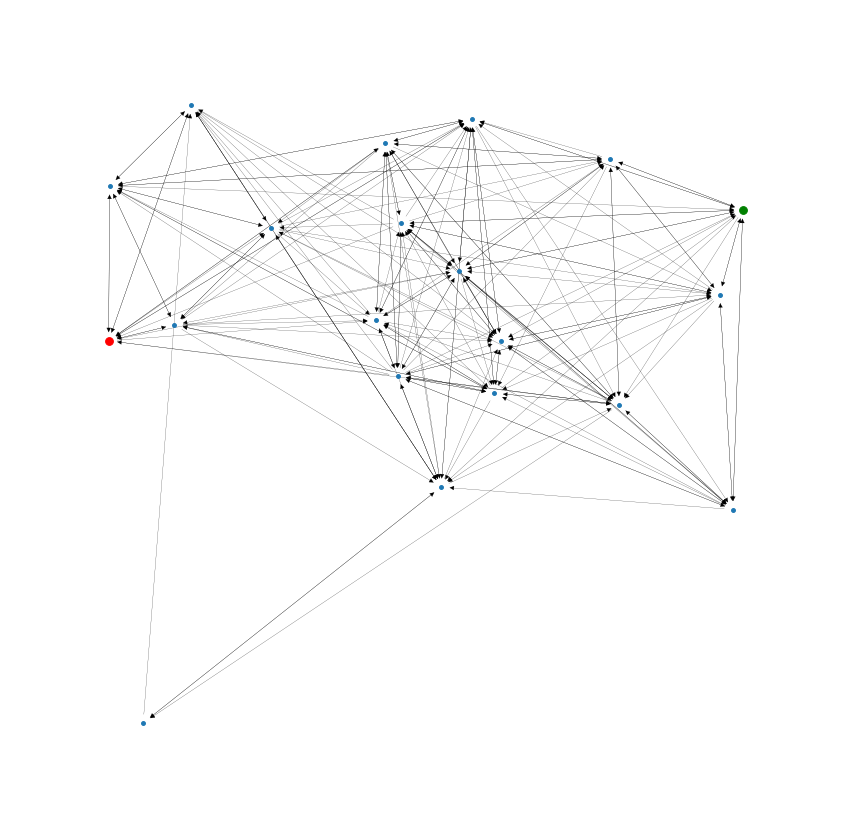

In [ ]:
# Origem é o mais à esquerda
mn_x = np.inf
o = 0
for i in G.nodes:
    if pos[ i ][ 0 ] < mn_x:
        mn_x = pos[ i ][ 0 ]
        o = i

# Destino é o mais à direita
mx_x = -np.inf
d = 0
for i in G.nodes:
    if pos[ i ][ 0 ] > mx_x:
        mx_x = pos[ i ][ 0 ]
        d = i

print( o, d )

pp.figure( figsize = ( 15, 15 ) )

nx.draw_networkx_nodes( G, pos, node_size = 15 )
nx.draw_networkx_edges( G, pos, width = 0.2 )

pp.scatter( pos[ o ][ 0 ], pos[ o ][ 1 ], c = 'r', s = 60, zorder = 10 )
pp.scatter( pos[ d ][ 0 ], pos[ d ][ 1 ], c = 'g', s = 60, zorder = 10 )

pp.margins( 0.1 )
pp.axis( 'off' )
pp.show()

In [ ]:
cm = nx.shortest_path( G, o, d, 'weight' )
print( cm )

[18, 1, 11]


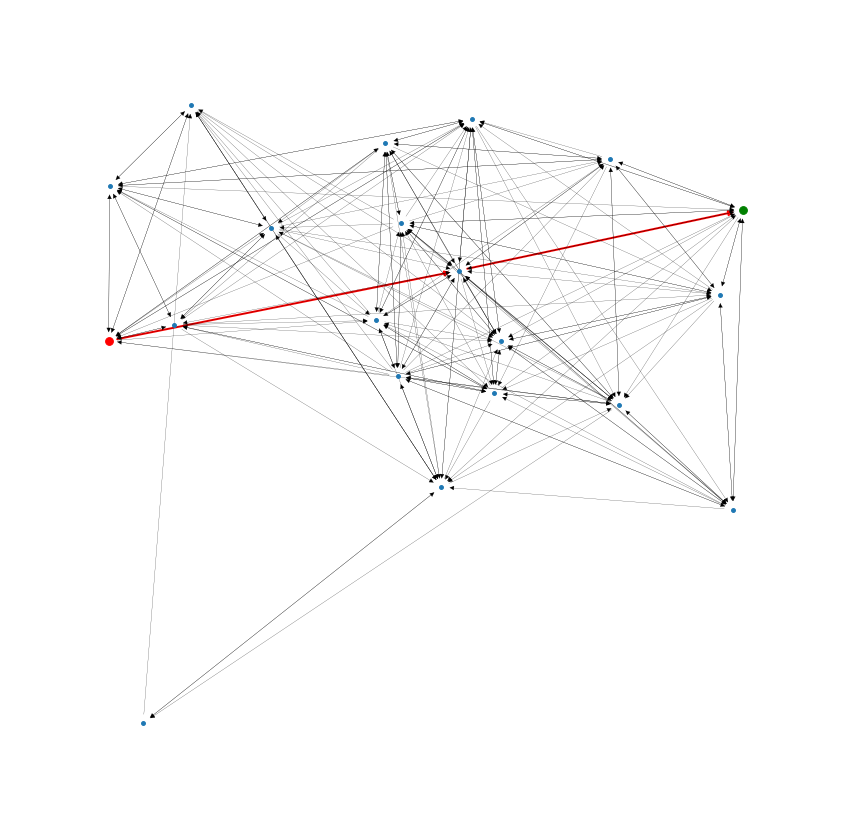

DiGraph with 20 nodes and 194 edges


In [ ]:
el = []
for i in range( len( cm ) - 1 ):
    el.append( ( cm[ i ], cm[ i + 1 ] ) )

pp.figure( figsize = ( 15, 15 ) )

nx.draw_networkx_edges( G, pos, width = 2.0, edgelist = el, edge_color = 'r' )
nx.draw_networkx_nodes( G, pos, node_size = 15 )
nx.draw_networkx_edges( G, pos, width = 0.2 )

pp.scatter( pos[ o ][ 0 ], pos[ o ][ 1 ], c = 'r', s = 60, zorder = 10 )
pp.scatter( pos[ d ][ 0 ], pos[ d ][ 1 ], c = 'g', s = 60, zorder = 10 )

pp.margins( 0.1 )
pp.axis( 'off' )
pp.show()

print( G )

Observe que

- A solução é obtida muito rapidamente

- O caminho possui poucas arestas, pois o grafo é relativamente *denso*

- Pode não haver caminho!

Vamos reduzir o número de arestas para exemplificar a segunda e a terceira observação:

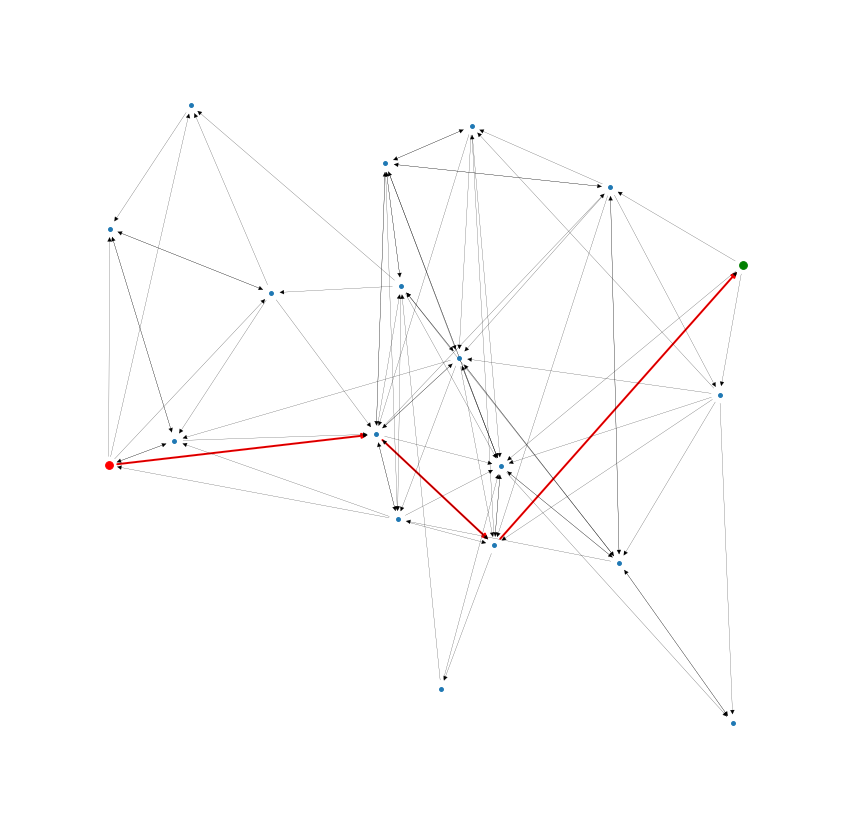

DiGraph with 19 nodes and 85 edges


In [ ]:
import networkx as nx
import matplotlib.pyplot as pp
import numpy as np

N = 20

# Gera N pontos aleatórios no quadrado [ 0, 1 ] x [ 0, 1 ]
np.random.seed( 0 )
pos = {}
for i in range( 1, N + 1 ):
    pos[ i ] = np.random.uniform( size = ( 2, ) )

# Conecta vértices com probabilidade proporcional à distância
G = nx.DiGraph()
for i in range( 1, N + 1 ):
    for j in range( 1, N + 1 ):
        d = (
            ( pos[ i ][ 0 ] - pos[ j ][ 0 ] ) ** 2 +
            ( pos[ i ][ 1 ] - pos[ j ][ 1 ] ) ** 2
        ) ** 0.5

        r = np.random.uniform()
        if ( i != j ) and ( d < r / 2 ):
            G.add_edge( i, j, weight = d )

# Origem é o mais à esquerda
mn_x = np.inf
o = 0
for i in G.nodes:
    if pos[ i ][ 0 ] < mn_x:
        mn_x = pos[ i ][ 0 ]
        o = i

# Destino é o mais à direita
mx_x = -np.inf
d = 0
for i in G.nodes:
    if pos[ i ][ 0 ] > mx_x:
        mx_x = pos[ i ][ 0 ]
        d = i

cm = nx.shortest_path( G, o, d, 'weight' )

el = []
for i in range( len( cm ) - 1 ):
    el.append( ( cm[ i ], cm[ i + 1 ] ) )

pp.figure( figsize = ( 15, 15 ) )

nx.draw_networkx_edges( G, pos, width = 2.0, edgelist = el, edge_color = 'r' )
nx.draw_networkx_nodes( G, pos, node_size = 15 )
nx.draw_networkx_edges( G, pos, width = 0.2 )

pp.scatter( pos[ o ][ 0 ], pos[ o ][ 1 ], c = 'r', s = 60, zorder = 10 )
pp.scatter( pos[ d ][ 0 ], pos[ d ][ 1 ], c = 'g', s = 60, zorder = 10 )

pp.margins( 0.1 )
pp.axis( 'off' )
pp.show()

print( G )

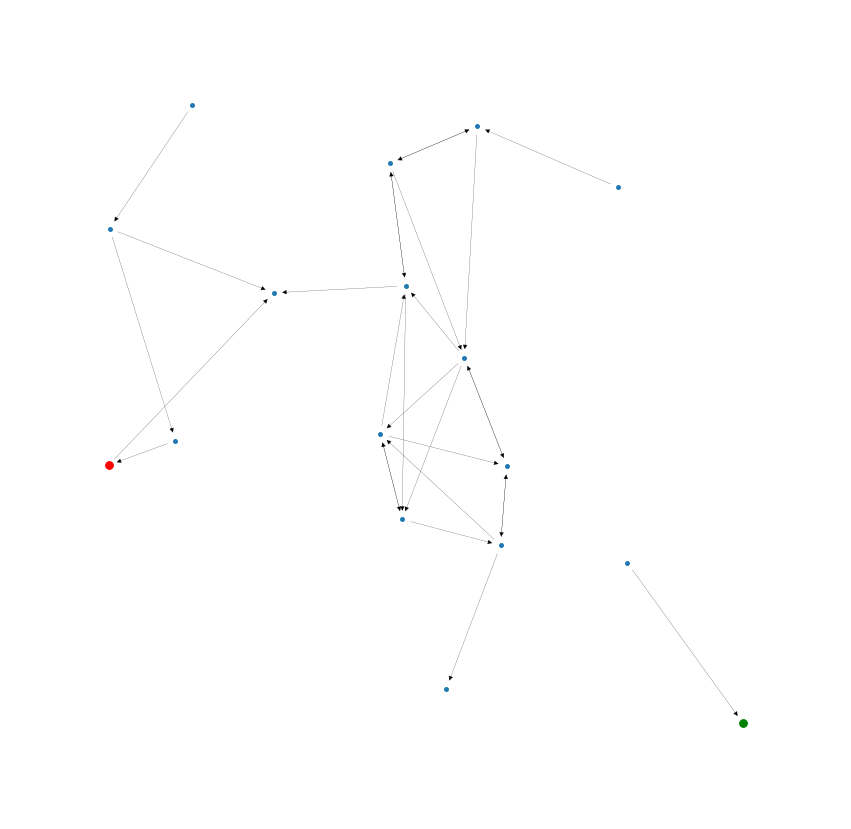

DiGraph with 17 nodes and 29 edges


In [ ]:
import networkx as nx
import matplotlib.pyplot as pp
import numpy as np

N = 20

# Gera N pontos aleatórios no quadrado [ 0, 1 ] x [ 0, 1 ]
np.random.seed( 0 )
pos = {}
for i in range( 1, N + 1 ):
    pos[ i ] = np.random.uniform( size = ( 2, ) )

# Conecta vértices com probabilidade proporcional à distância
G = nx.DiGraph()
for i in range( 1, N + 1 ):
    for j in range( 1, N + 1 ):
        d = (
            ( pos[ i ][ 0 ] - pos[ j ][ 0 ] ) ** 2 +
            ( pos[ i ][ 1 ] - pos[ j ][ 1 ] ) ** 2
        ) ** 0.5

        r = np.random.uniform()
        if ( i != j ) and ( d < r / 3 ):
            G.add_edge( i, j, weight = d )

# Origem é o mais à esquerda
mn_x = np.inf
o = 0
for i in G.nodes:
    if pos[ i ][ 0 ] < mn_x:
        mn_x = pos[ i ][ 0 ]
        o = i

# Destino é o mais à direita
mx_x = -np.inf
d = 0
for i in G.nodes:
    if pos[ i ][ 0 ] > mx_x:
        mx_x = pos[ i ][ 0 ]
        d = i

pp.figure( figsize = ( 15, 15 ) )

nx.draw_networkx_nodes( G, pos, node_size = 15 )
nx.draw_networkx_edges( G, pos, width = 0.2 )

pp.scatter( pos[ o ][ 0 ], pos[ o ][ 1 ], c = 'r', s = 60, zorder = 10 )
pp.scatter( pos[ d ][ 0 ], pos[ d ][ 1 ], c = 'g', s = 60, zorder = 10 )

pp.margins( 0.1 )
pp.axis( 'off' )
pp.show()

print( G )

In [ ]:
cm = nx.shortest_path( G, o, d, 'weight' )

NetworkXNoPath: No path between 18 and 5.

## 3. Resolvendo com Otimização Linear

Vamos resolver com otimização linear através do modelo relaxado
$$
\begin{align*}
        \min       & \quad \sum_{( i, j ) \in E} f( i, j )x_{i, j}\\
        \text{s.a:}& \quad \sum_{( i, k ) \in E}x_{i, k} - \sum_{( k, j ) \in E}x_{k, j} = \begin{cases}1 &\text{se } k = d\\ -1 &\text{se } k = o\\ 0 & \text{caso contrário}\end{cases} &\quad \forall k \in V\\
                   & \quad x_{i, j} \ge 0 \quad &\forall ( i, j ) \in E.
\end{align*}
$$

In [ ]:
import networkx as nx
import matplotlib.pyplot as pp
import numpy as np
import mip

N = 20

# Gera N pontos aleatórios no quadrado [ 0, 1 ] x [ 0, 1 ]
np.random.seed( 0 )
pos = {}
for i in range( 1, N + 1 ):
    pos[ i ] = np.random.uniform( size = ( 2, ) )

# Conecta vértices com probabilidade proporcional à distância
G = nx.DiGraph()
for i in range( 1, N + 1 ):
    for j in range( 1, N + 1 ):
        d = (
            ( pos[ i ][ 0 ] - pos[ j ][ 0 ] ) ** 2 +
            ( pos[ i ][ 1 ] - pos[ j ][ 1 ] ) ** 2
        ) ** 0.5

        r = np.random.uniform()
        if ( i != j ) and ( d < r / 2 ):
            G.add_edge( i, j, weight = d )

# Origem é o mais à esquerda
mn_x = np.inf
o = 0
for i in G.nodes:
    if pos[ i ][ 0 ] < mn_x:
        mn_x = pos[ i ][ 0 ]
        o = i

# Destino é o mais à direita
mx_x = -np.inf
d = 0
for i in G.nodes:
    if pos[ i ][ 0 ] > mx_x:
        mx_x = pos[ i ][ 0 ]
        d = i

$$
\begin{align*}
        \min       & \quad \sum_{( i, j ) \in E} f( i, j )x_{i, j}\\
        \text{s.a:}& \quad \sum_{( i, k ) \in E}x_{i, k} - \sum_{( k, j ) \in E}x_{k, j} = \begin{cases}1 &\text{se } k = d\\ -1 &\text{se } k = o\\ 0 & \text{caso contrário}\end{cases} &\quad \forall k \in V\\
                   & \quad x_{i, j} \ge 0 \quad &\forall ( i, j ) \in E.
\end{align*}
$$

In [ ]:
m = mip.Model()

# Uma variável por aresta
x = {}
for e in G.edges:
    x[ e ] = m.add_var( lb = 0.0 )

# Função objetivo
m.objective = mip.xsum( G.get_edge_data( *e )[ 'weight' ] * x[ e ] for e in G.edges )

# Restrições:
for k in G.nodes:
    b = 1 if k == d else ( -1 if k == o else 0 )
    m += (
        mip.xsum( x[ i, k ] for i in G.predecessors( k ) ) - \
            mip.xsum( x[ k, j ] for j in G.successors( k ) ) == \
                  b
    )

status = m.optimize()

Welcome to the CBC MILP Solver 
Version: Trunk
Build Date: Oct 24 2021 

Starting solution of the Linear programming problem using Dual Simplex

Coin0506I Presolve 15 (-4) rows, 74 (-11) columns and 148 (-22) elements
Clp0000I Optimal - objective value 1.0652658
Coin0511I After Postsolve, objective 1.0652658, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 1.06526583 - 8 iterations time 0.002, Presolve 0.00


In [ ]:
print( status )

OptimizationStatus.OPTIMAL


In [ ]:
for e in G.edges:
    if abs( x[ e ].x ) > 1e-6:
        print( e )

print( o, d )

(2, 11)
(3, 2)
(18, 3)
18 11


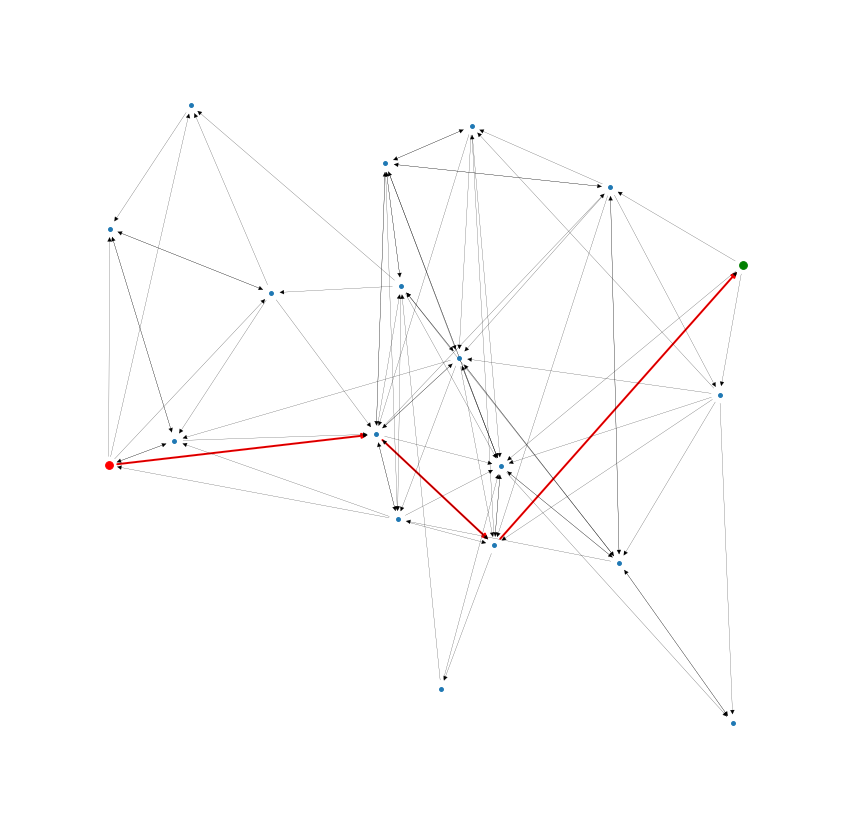

In [ ]:
pp.figure( figsize = ( 15, 15 ) )

nx.draw_networkx_edges( G, pos, width = 2.0, edgelist = [ e for e in G.edges if abs( x[ e ].x ) > 1e-6 ], edge_color = 'r' )
nx.draw_networkx_nodes( G, pos, node_size = 15 )
nx.draw_networkx_edges( G, pos, width = 0.2 )

pp.scatter( pos[ o ][ 0 ], pos[ o ][ 1 ], c = 'r', s = 60, zorder = 10 )
pp.scatter( pos[ d ][ 0 ], pos[ d ][ 1 ], c = 'g', s = 60, zorder = 10 )

pp.margins( 0.1 )
pp.axis( 'off' )
pp.show()

Observe que

- Há um único caminho mínimo

- O resultado do problema relaxado é o mesmo que o anterior!

- As arestas não estão ordenadas de acordo com o caminho a ser percorrido!

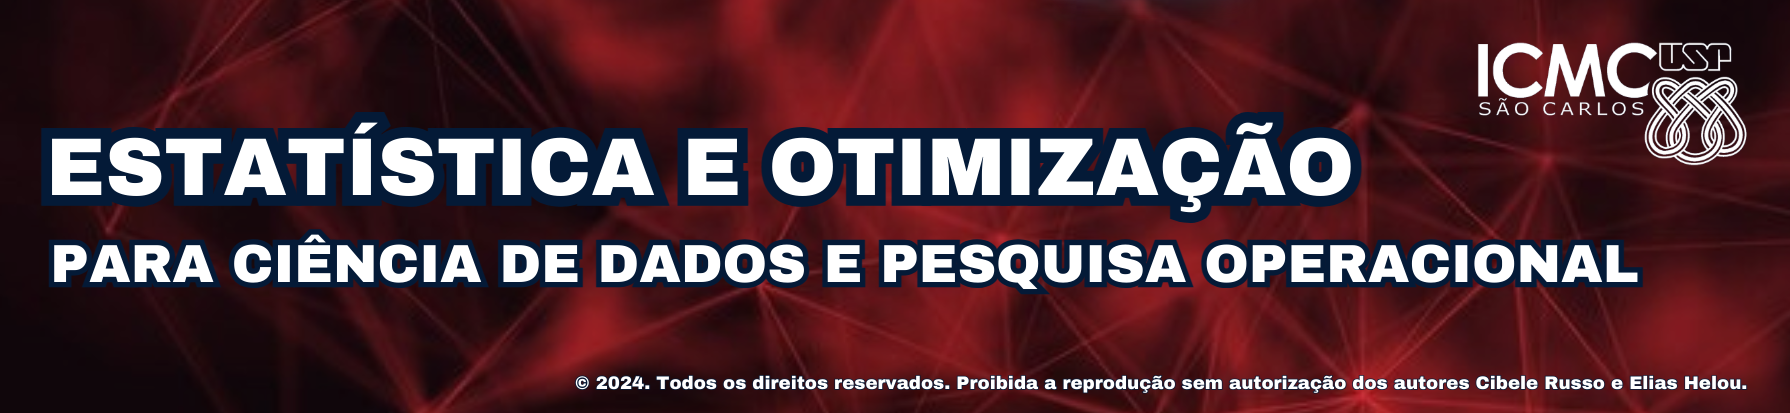

<h1 style = 'text-align: center;'>Problemas de Fluxos em Redes:<br>O Problema do Fluxo Máximo</h1>

por **Elias Helou**

**ICMC/USP - São Carlos SP**

<h2>Conteúdo do Vídeo</h2>

1.  O Problema do Fluxo Máximo

2. Solução através do `NetworkX`

3. Solução por otimização linear

<h2>1. O Problema do Fluxo Máximo</h2>

- Em um problema do fluxo máximo, temos um grafo cujas arestas possuem uma capacidade

- Novamente, um nó é a origem e outro é o destino

- Queremos saber qual o maior valor de fluxo que pode ser transportado entre a origem e o destino

- Cada aresta pode transportar no máximo o fluxo determinado pela sua capacidade

$$
    V = \{ 1, 2, \dots, N \},
$$
$$
    E \subset V \times V,
$$
$$
    f: E \to \mathbb R,
$$
$$
    o, d \in V.
$$

Este problema possui muitas aplicações:

- Redes de transporte

- Planejamento de logística

- Redes de comunicação

- Sistemas elétricos

- Controle de multidões

- Análise de redes sociais

### 1.1. Exemplo

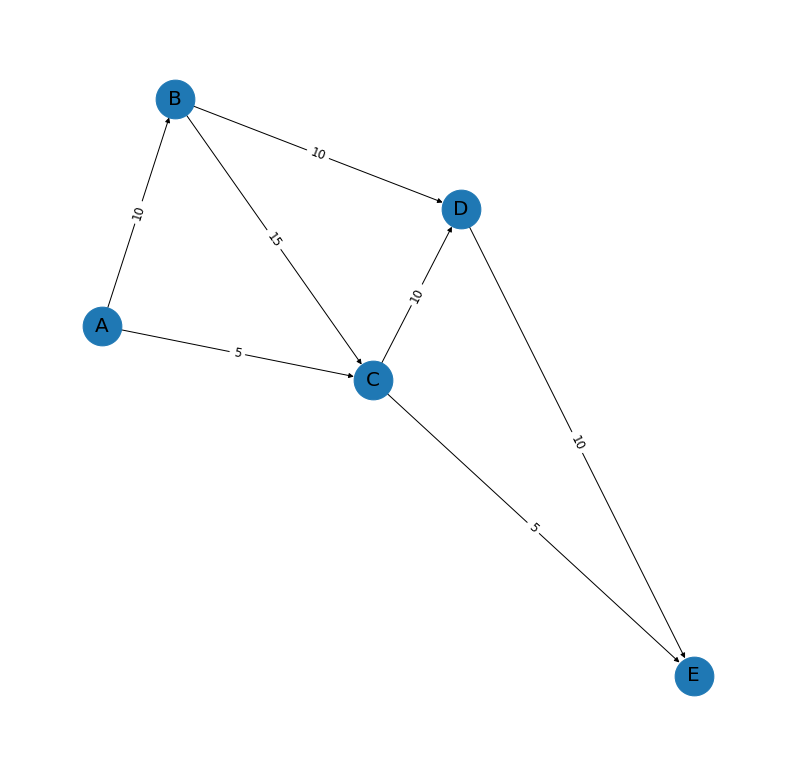

In [ ]:
import networkx as nx
import matplotlib.pyplot as pp

# Criar o grafo dirigido
G = nx.DiGraph()

# Adicionar arestas e capacidades
edges = [
    ( 'A', 'B', 10 ),
    ( 'A', 'C', 5 ),
    ( 'B', 'C', 15 ),
    ( 'B', 'D', 10 ),
    ( 'C', 'D', 10 ),
    ( 'C', 'E', 5 ),
    ( 'D', 'E', 10 )
]

for u, v, capacity in edges:
    G.add_edge( u, v, capacity = capacity )

pos = nx.spring_layout( G, seed = 0 )

pp.figure( figsize = ( 14, 14 ) )

nx.draw_networkx_nodes( G, pos, node_size = 1500 )
nx.draw_networkx_edges( G, pos, node_size = 1500 )
nx.draw_networkx_labels( G, pos, font_size = 20, font_family = 'sans-serif' )

edge_labels = nx.get_edge_attributes( G, 'capacity' )
nx.draw_networkx_edge_labels( G, pos, edge_labels, font_size = 12, font_family = 'sans-serif' )

pp.margins( 0.1 )
pp.axis( 'off' )
pp.show()


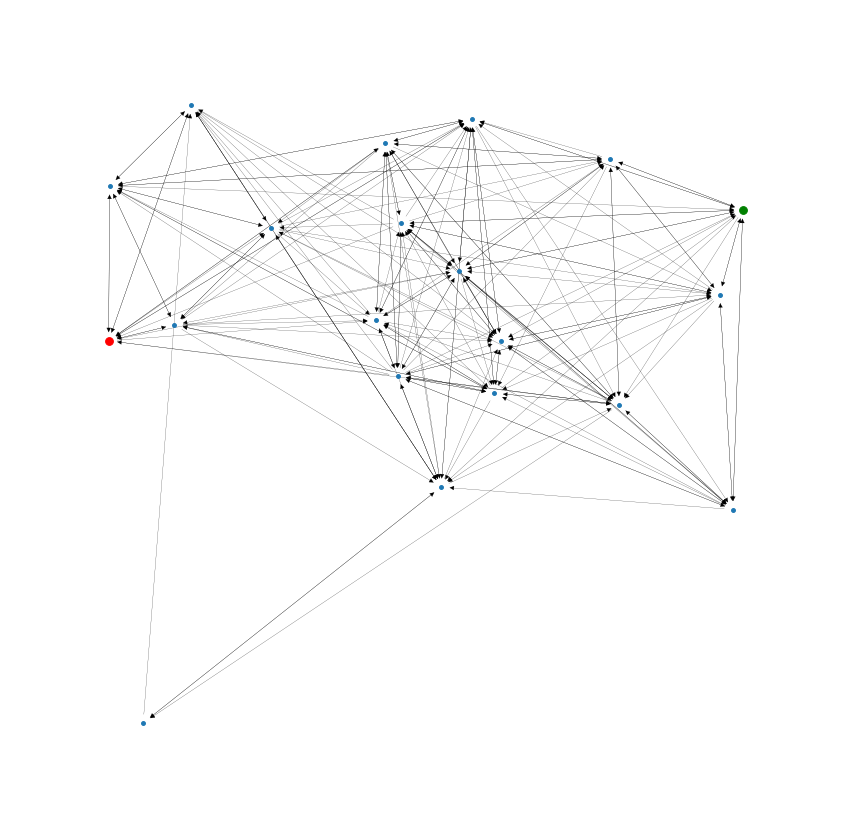

In [ ]:
import networkx as nx
import matplotlib.pyplot as pp
import numpy as np

N = 20

# Gera N pontos aleatórios no quadrado [ 0, 1 ] x [ 0, 1 ]
np.random.seed( 0 )
pos = {}
for i in range( 1, N + 1 ):
    pos[ i ] = tuple( np.random.uniform( size = ( 2, ) ) )

# Conecta vértices com probabilidade proporcional à distância
G = nx.DiGraph()
for i in range( 1, N + 1 ):
    for j in range( 1, N + 1 ):
        d = (
            ( pos[ i ][ 0 ] - pos[ j ][ 0 ] ) ** 2 +
            ( pos[ i ][ 1 ] - pos[ j ][ 1 ] ) ** 2
        ) ** 0.5

        r = np.random.uniform()
        if ( i != j ) and ( d < r ):
            G.add_edge( i, j, capacity = 1 / d, weight = 1 )

# Origem é o mais à esquerda
mn_x = np.inf
o = 0
for i in G.nodes:
    if pos[ i ][ 0 ] < mn_x:
        mn_x = pos[ i ][ 0 ]
        o = i

# Destino é o mais à direita
mx_x = -np.inf
d = 0
for i in G.nodes:
    if pos[ i ][ 0 ] > mx_x:
        mx_x = pos[ i ][ 0 ]
        d = i

pp.figure( figsize = ( 15, 15 ) )

nx.draw_networkx_nodes( G, pos, node_size = 15 )
nx.draw_networkx_edges( G, pos, width = 0.2 )

pp.scatter( pos[ o ][ 0 ], pos[ o ][ 1 ], c = 'r', s = 60, zorder = 10 )
pp.scatter( pos[ d ][ 0 ], pos[ d ][ 1 ], c = 'g', s = 60, zorder = 10 )

pp.margins( 0.1 )
pp.axis( 'off' )
pp.show()


## 2. Solução Através do `NetworkX`

O pacote `NetworkX` possui uma função para resolver problemas de fluxo

<div style="text-align: center;">
 <iframe type="text/html" src="https://networkx.org/documentation/stable/reference/algorithms/flow.html" width="90%" height="700px" style="text-align: center; border: solid; border-radius: 10px;">
</div>

In [ ]:
f_mx, f_dict = nx.maximum_flow( G, o, d )
print( f_mx )

26.817519692388025


55


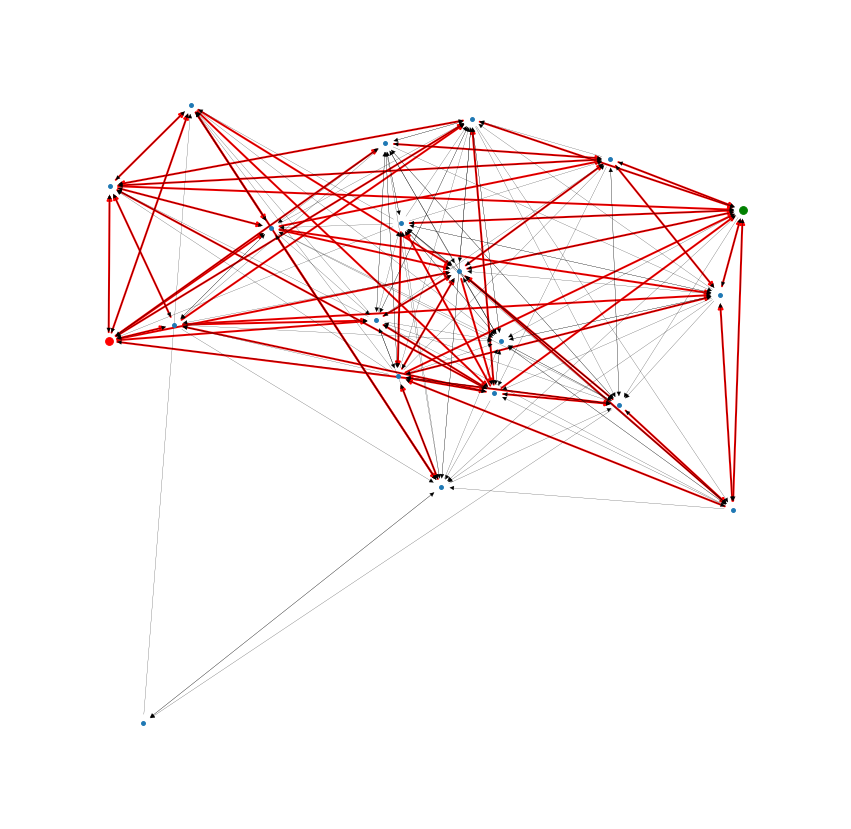

In [ ]:
el = []
ld = {}
for i in f_dict.keys():
    for j in f_dict[ i ]:
        if f_dict[ i ][ j ] > 1e-6:
            el.append( ( i, j ) )
            ld[ ( i, j ) ] = '%.2f / %.2f' % ( f_dict[ i ][ j ], G.get_edge_data( i, j )[ 'capacity' ] )

print( len( el ) )

pp.figure( figsize = ( 15, 15 ) )

nx.draw_networkx_nodes( G, pos, node_size = 15 )
nx.draw_networkx_edges( G, pos, width = 2, edgelist = el, edge_color = 'r' )
nx.draw_networkx_edges( G, pos, width = 0.2 )

pp.scatter( pos[ o ][ 0 ], pos[ o ][ 1 ], c = 'r', s = 60, zorder = 10 )
pp.scatter( pos[ d ][ 0 ], pos[ d ][ 1 ], c = 'g', s = 60, zorder = 10 )

pp.margins( 0.1 )
pp.axis( 'off' )
pp.show()


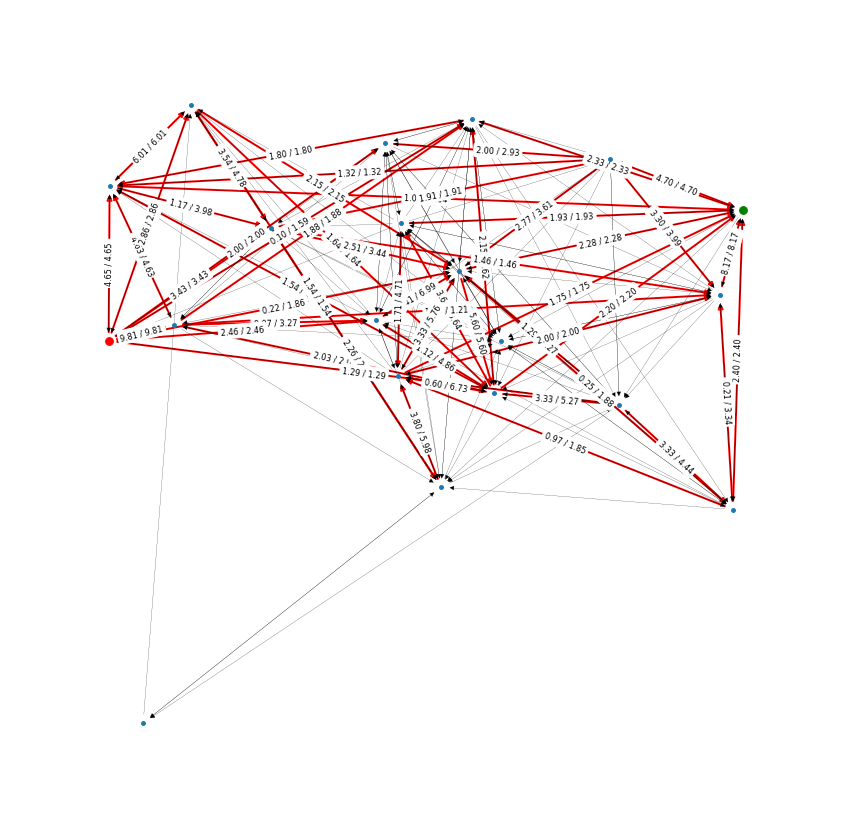

In [ ]:
pp.figure( figsize = ( 15, 15 ) )

nx.draw_networkx_nodes( G, pos, node_size = 15 )
nx.draw_networkx_edges( G, pos, width = 2, edgelist = el, edge_color = 'r' )
nx.draw_networkx_edges( G, pos, width = 0.2 )
nx.draw_networkx_edge_labels( G, pos, ld, font_size = 8, font_family = 'sans-serif' )

pp.scatter( pos[ o ][ 0 ], pos[ o ][ 1 ], c = 'r', s = 60, zorder = 10 )
pp.scatter( pos[ d ][ 0 ], pos[ d ][ 1 ], c = 'g', s = 60, zorder = 10 )

pp.margins( 0.1 )
pp.axis( 'off' )
pp.show()


In [ ]:
f_dict = nx.max_flow_min_cost( G, o, d )

41


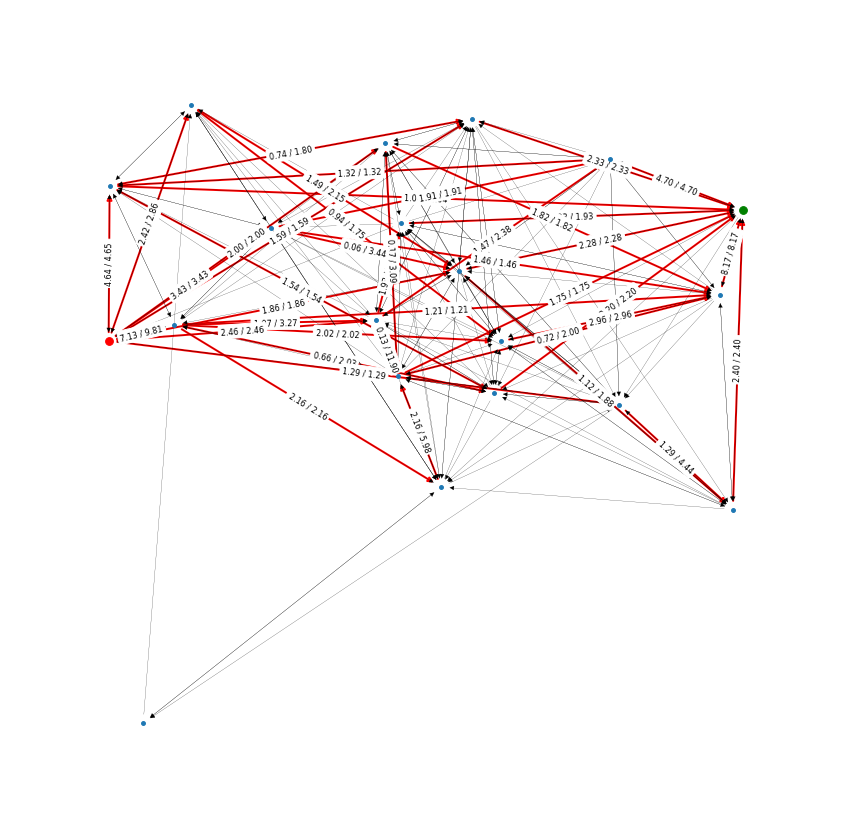

In [ ]:
el = []
ld = {}
for i in f_dict.keys():
    for j in f_dict[ i ]:
        if f_dict[ i ][ j ] > 1e-6:
            el.append( ( i, j ) )
            ld[ ( i, j ) ] = '%.2f / %.2f' % ( f_dict[ i ][ j ], G.get_edge_data( i, j )[ 'capacity' ] )

print( len( el ) )

pp.figure( figsize = ( 15, 15 ) )

nx.draw_networkx_nodes( G, pos, node_size = 15 )
nx.draw_networkx_edges( G, pos, width = 2, edgelist = el, edge_color = 'r' )
nx.draw_networkx_edges( G, pos, width = 0.2 )
nx.draw_networkx_edge_labels( G, pos, ld, font_size = 8, font_family = 'sans-serif' )

pp.scatter( pos[ o ][ 0 ], pos[ o ][ 1 ], c = 'r', s = 60, zorder = 10 )
pp.scatter( pos[ d ][ 0 ], pos[ d ][ 1 ], c = 'g', s = 60, zorder = 10 )

pp.margins( 0.1 )
pp.axis( 'off' )
pp.show()


## 3. Solução Através de Otimização Linear

O problema do fluxo máximo pode ser modelado de forma simples como um problema de otimização linear

$$
\begin{align*}
        \max       & \quad F\\
        \text{s.a:}& \quad \sum_{( i, k ) \in E}x_{i, k} - \sum_{( k, j ) \in E}x_{k, j} = \begin{cases}F &\text{se } k = d\\ -F &\text{se } k = o\\ 0 & \text{caso contrário}\end{cases} &\quad \forall k \in V\\
                   & \quad 0 \le x_{i, j} \le f( i, j ) & \forall ( i, j ) \in E.
\end{align*}
$$


In [ ]:
import mip

m = mip.Model()

# Uma variável por aresta
x = {}
for e in G.edges:
    x[ e ] = m.add_var( lb = 0.0, ub = G.get_edge_data( *e )[ 'capacity' ] )
# Fluxo
F = m.add_var( lb = 0.0 )

# Função objetivo
m.objective = -F

# Restrições:
for k in G.nodes:
    b = F if k == d else ( -F if k == o else 0 )
    m += (
        mip.xsum( x[ i, k ] for i in G.predecessors( k ) ) - \
            mip.xsum( x[ k, j ] for j in G.successors( k ) ) == \
                  b
    )

status = m.optimize()

Welcome to the CBC MILP Solver 
Version: Trunk
Build Date: Oct 24 2021 

Starting solution of the Linear programming problem using Dual Simplex

Coin0506I Presolve 20 (0) rows, 195 (0) columns and 390 (0) elements
Clp0014I Perturbing problem by 0.001% of 1 - largest nonzero change 4.2116734e-05 ( 0.0042116734%) - largest zero change 4.1778355e-05
Clp0000I Optimal - objective value -26.81752
Clp0032I Optimal objective -26.81751969 - 46 iterations time 0.002


In [ ]:
print( status )

OptimizationStatus.OPTIMAL


43


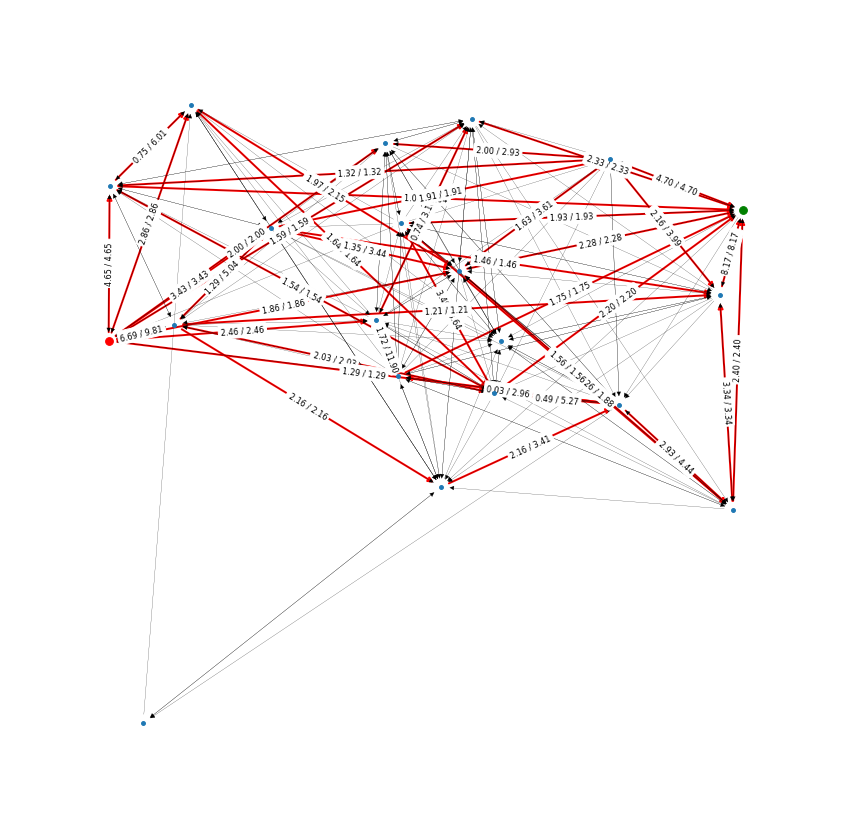

In [ ]:
el = []
ld = {}
for e in G.edges:
    if x[ e ].x > 1e-6:
        el.append( e )
        ld[ e ] = '%.2f / %.2f' % ( x[ e ].x, G.get_edge_data( *e )[ 'capacity' ] )

print( len( el ) )

pp.figure( figsize = ( 15, 15 ) )

nx.draw_networkx_nodes( G, pos, node_size = 15 )
nx.draw_networkx_edges( G, pos, width = 2, edgelist = el, edge_color = 'r' )
nx.draw_networkx_edges( G, pos, width = 0.2 )
nx.draw_networkx_edge_labels( G, pos, ld, font_size = 8, font_family = 'sans-serif' )

pp.scatter( pos[ o ][ 0 ], pos[ o ][ 1 ], c = 'r', s = 60, zorder = 10 )
pp.scatter( pos[ d ][ 0 ], pos[ d ][ 1 ], c = 'g', s = 60, zorder = 10 )

pp.margins( 0.1 )
pp.axis( 'off' )
pp.show()
